In [72]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [73]:
Batch_size=32
Image_size=256
Epochs=15
channels=3

In [74]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [75]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
tf.Tensor([1 0 1 0 1 1 0 2 0 0 2 1 0 0 1 0 0 0 2 1 0 1 2 0 0 0 0 2 1 1 0 0], shape=(32,), dtype=int32)


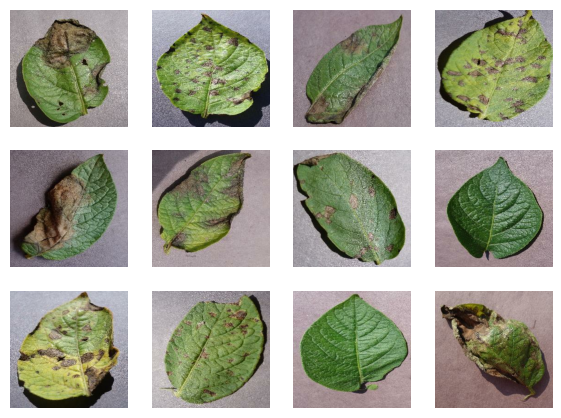

In [76]:
plt.figure(figsize=(7,7))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)
    for i in range(12):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")



In [77]:
def getDatasetPartitionTF(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [78]:
train_ds, val_ds, test_ds = getDatasetPartitionTF(dataset)

In [79]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [80]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [81]:
resize_rescale = tf.keras.Sequential([
  layers.Resizing(Image_size, Image_size),
  layers.Rescaling(1./255),
])


In [82]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [83]:
input_shape = (Image_size, Image_size, channels)
n_classes = 3

model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [84]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)    │ (None, 256, 256, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_48 (Conv2D)            │ (None, 254, 254, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_48              │ (None, 127, 127, 32)  │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_49 (Conv2D)            │ (None, 125, 125, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_49              │ (None, 62, 62, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_50 (Conv2D)            │ (None, 60, 60, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_50              │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_51 (Conv2D)            │ (None, 28, 28, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_51              │ (None, 14, 14, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_52 (Conv2D)            │ (None, 12, 12, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_52              │ (None, 6, 6, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_53 (Conv2D)            │ (None, 4, 4, 64)      │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_53              │ (None, 2, 2, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_8 (Flatten)           │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_16 (Dense)              │ (None, 64)            │       16,448 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_17 (Dense)              │ (None, 3)             │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [86]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=Epochs,
)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 874ms/step - accuracy: 0.4818 - loss: 0.9643 - val_accuracy: 0.4896 - val_loss: 0.8375
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 879ms/step - accuracy: 0.5215 - loss: 0.8624 - val_accuracy: 0.7344 - val_loss: 0.6141
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 866ms/step - accuracy: 0.7215 - loss: 0.5983 - val_accuracy: 0.7865 - val_loss: 0.5543
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 858ms/step - accuracy: 0.8184 - loss: 0.4170 - val_accuracy: 0.8750 - val_loss: 0.4116
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 853ms/step - accuracy: 0.8395 - loss: 0.3813 - val_accuracy: 0.8646 - val_loss: 0.2910
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 844ms/step - accuracy: 0.8739 - loss: 0.3128 - val_accuracy: 0.8958 - val_loss: 0.3021
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 841ms/step - accuracy: 0.8979 - loss: 0.2543 - val_accuracy: 0.9323 - val_loss: 0.2373
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 45s 842ms/step - accuracy: 0.9091 - loss: 0.2173 - val_accu

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

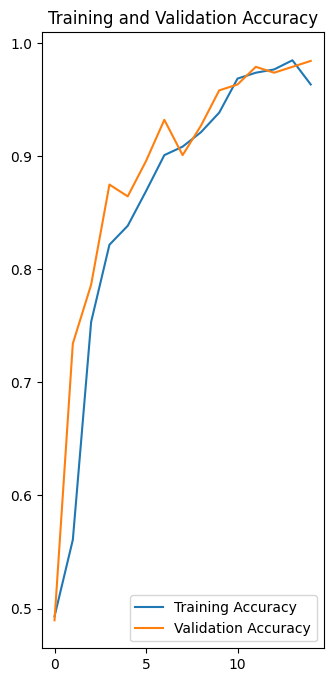

In [91]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
predicted label: Potato___Early_blight


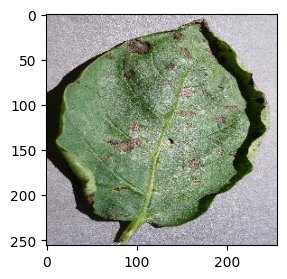

In [101]:
import numpy as np
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [102]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


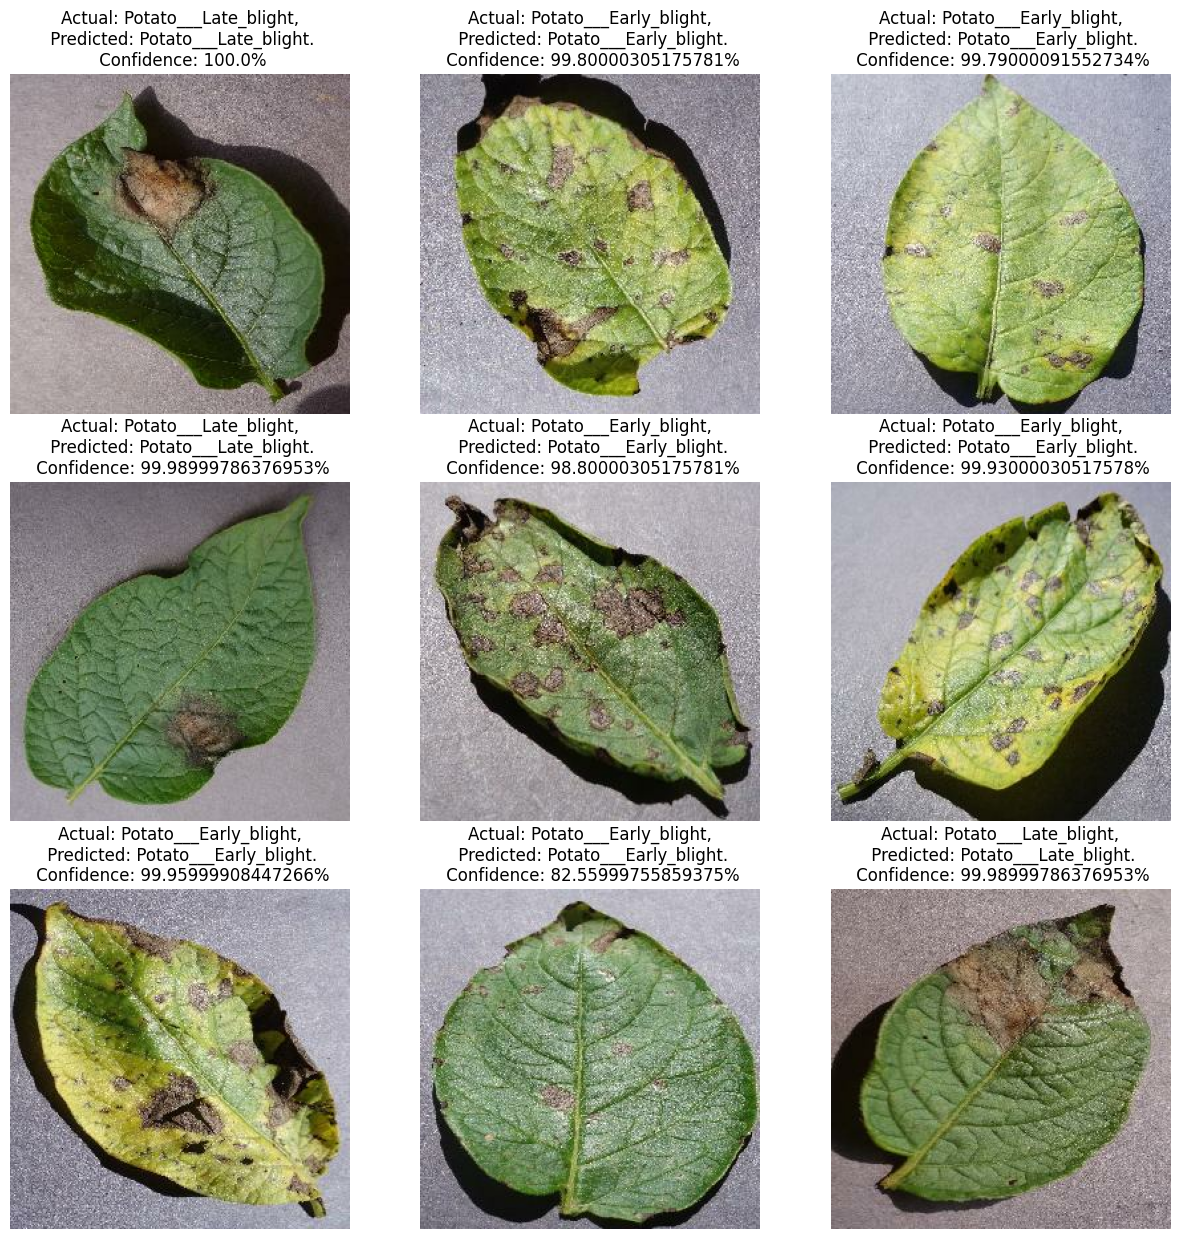

In [109]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [124]:
import os

model_dir = "../models"
existing_versions = [
    int(f.split(".")[0])  # split '1.keras' to get '1', then convert to int
    for f in os.listdir(model_dir)
    if f.endswith(".keras") and f.split(".")[0].isdigit()
]

model_version = max(existing_versions + [0]) + 1
model.save(f"{model_dir}/{model_version}.keras")